In [7]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
from skimage.filters import threshold_otsu
from skimage.measure import label
from uncertainties import ufloat
import uncertainties as ct
from uncertainties import unumpy as unp
from scipy.optimize import curve_fit
import importlib
import sys

sys.path.append('C:\\Users\\marcu\\OneDrive\\Desktop\\PraktikumIII\\CapillaryRiseInSoil\\notebooks')

import amglib.imageutils as amg
import amglib.readers as rd
import amglib.bb as bblib

import os

os.chdir('C:\\Users\\marcu\\OneDrive\\Desktop\\PraktikumIII\\CapillaryRiseInSoil')

In [8]:
"""
ob: open beam
dc: dark current
es: empty step wedge

"""
ob = rd.readImages('data/02_rawdata/01_Stepwedges/ob_{0:05d}.fits',first=1,last=11).astype(float).mean(axis=0)
dc = rd.readImages('data/02_rawdata/01_Stepwedges/dc_{0:05d}.fits',first=1,last=11).astype(float).mean(axis=0)
es = rd.readImages('data/02_rawdata/01_Stepwedges/container_{0:05d}.fits',first=1,last=6).astype(float).mean(axis=0) 
bb = rd.readImages('data/02_rawdata/01_Stepwedges/bb_{0:05d}.fits',first=1,last=6).astype(float).mean(axis=0)
bbes = rd.readImages('data/02_rawdata/01_Stepwedges/water_bb_{0:05d}.fits',first=1,last=6).astype(float).mean(axis=0)
water = rd.readImages('data/02_rawdata/01_Stepwedges/water_{0:05d}.fits',first=1,last=6).astype(float).mean(axis=0)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

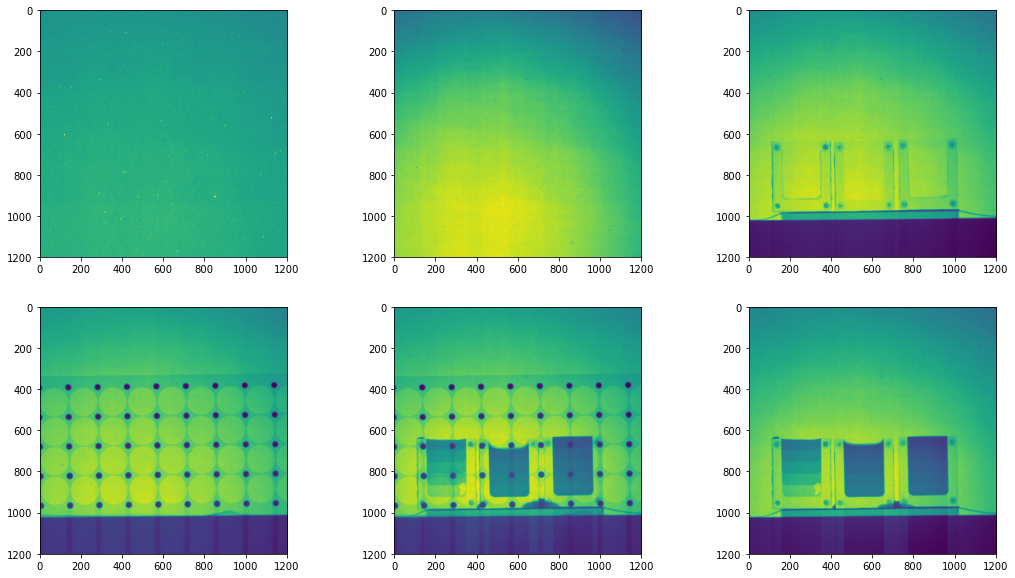

In [9]:
fig, ax = plt.subplots(2,3)
fig.set_size_inches(18,10)
ax = ax.ravel()
ax[0].imshow(dc[::-1], vmin=250, vmax=350)
ax[1].imshow(ob[::-1])
ax[2].imshow(es[::-1])
ax[3].imshow(bb[::-1])
ax[4].imshow(bbes[::-1])
ax[5].imshow(water[::-1])

# for (axis, wedge) in zip(ax, [ob, dc, es, bb, bbes, water]):
#     pcm = axis.pcolormesh(wedge[::-1])
#     fig.colorbar(pcm, ax=axis, shrink=0.5)

# BB - finding scatter_images 

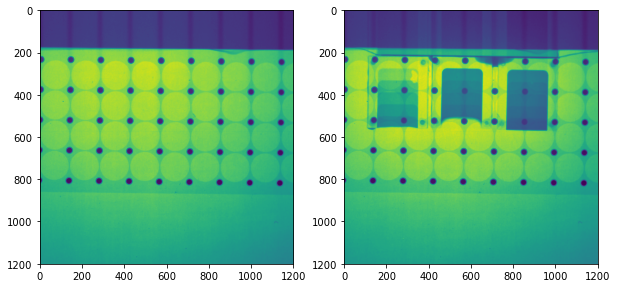

In [10]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 6)

ax = ax.ravel()
ax[0].imshow(bb)
# ax[0].set_title(""
ax[1].imshow(bbes)

In [11]:
pwd()

'C:\\Users\\marcu\\OneDrive\\Desktop\\PraktikumIII\\CapillaryRiseInSoil'

Text(0.5, 1.0, 'Black body and containers, histrogram')

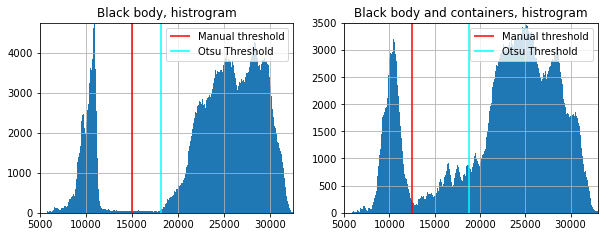

In [12]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 3.5)
ax[0].hist(bb.ravel(), bins=1000);
ax[0].set_xlim(5000, 32500)
ax[0].set_ylim(0, 4750)
ax[0].vlines([15000], ymax=5000, ymin=0, color='r', label="Manual threshold")
ax[0].vlines([threshold_otsu(bb.ravel())], ymax=5000 ,ymin=0,color='cyan', label = "Otsu Threshold")
ax[0].grid()
ax[0].legend(loc="upper right")
ax[0].set_title("Black body, histrogram")

ax[1].hist(bbes.ravel(), bins=1000);
ax[1].set_xlim(5000, 33000)
ax[1].set_ylim(0, 3500)
ax[1].vlines([12500], ymax=5000, ymin=0, color='r', label="Manual threshold")
ax[1].vlines([threshold_otsu(bbes.ravel())], ymax=5000 ,ymin=0,color='cyan', label = "Otsu Threshold")
ax[1].grid()
ax[1].legend(loc="upper right")
ax[1].set_title("Black body and containers, histrogram")

# fig.savefig("BB_Histograms")

In [13]:
print("Left")
print(f"Guessed: {15000}, Otsu: {threshold_otsu(bb)}")
print("Right")
print(f"Guessed: {12500}, Otsu: {threshold_otsu(bbes)}")

Left
Guessed: 15000, Otsu: 18177.944986979168
Right
Guessed: 12500, Otsu: 18794.9814453125


Choose cutoffs 18000 and 19000

Text(0.5, 1.0, 'BB: open beam and empty step wedges')

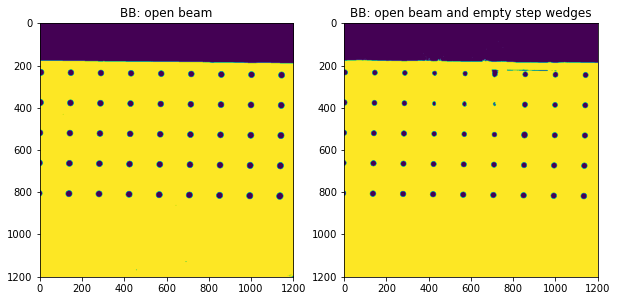

In [14]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 6)
ax[0].imshow(18000<bb)
ax[0].set_title("BB: open beam")
ax[1].imshow(12500<bbes)
ax[1].set_title("BB: open beam and empty step wedges")
# fig.savefig("BB_BBs_found")

In [15]:
# bb = bb[250:800,:]
# bbes = bbes[250:800,:]

In [16]:
# th1 = 12500; th2 = 12750; th3 = 13000; th4 = 13250; th5 = 13500;
# fig, ax = plt.subplots(1,5)
# fig.set_size_inches(18,10)
# ax = ax.ravel()
# ax[0].imshow(th1<bbes); ax[1].imshow(th2<bbes); ax[2].imshow(th3<bbes); ax[3].imshow(th4<bbes); ax[4].imshow(th5<bbes);

In [17]:
maskbb,rbb,cbb = bblib.get_black_bodies(bb, greythres=15000, areas=[0, 1000] , R=9)
maskbbes,rbbes,cbbes = bblib.get_black_bodies(bbes, greythres=12500, areas=[0, 1000], R=9)

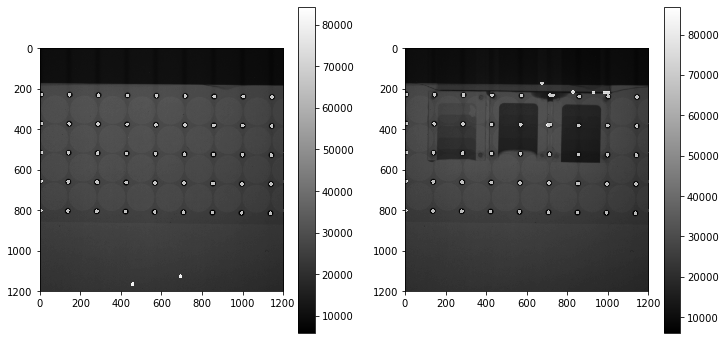

In [18]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 10)
# plt.suptitle("Uncleaned masks supoerimposed over the bb grids")
a0=ax[0].imshow(1000*maskbb+bb, interpolation='none',cmap='gray')
fig.colorbar(a0, ax=ax[0],shrink=0.6);

a1=ax[1].imshow(1000*maskbbes+bbes,interpolation='none',cmap='gray')
fig.colorbar(a1,ax=ax[1],shrink=0.6);


# fig.savefig("plots/BBGrid_Identified_BBsUncleaned.png")

###### Fix imperfections in the masked images 

In [19]:
a0 = 1000*maskbb+bb
a1 = 1000*maskbbes+bbes

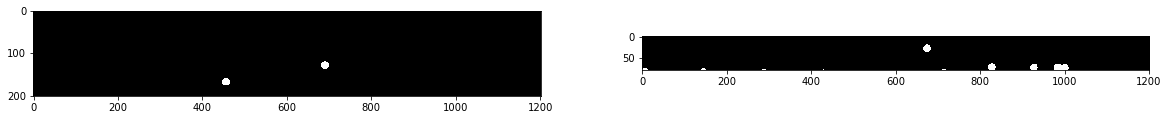

In [20]:
fig, ax = plt.subplots(1, 2)
# fig.set_dpi(1500)
fig.set_size_inches(20, 15)
ax = ax.ravel()

ax[0].imshow(maskbb[1000:,:], interpolation='none',cmap='gray')
ax[1].imshow(maskbbes[150:230, :],interpolation='none',cmap='gray')

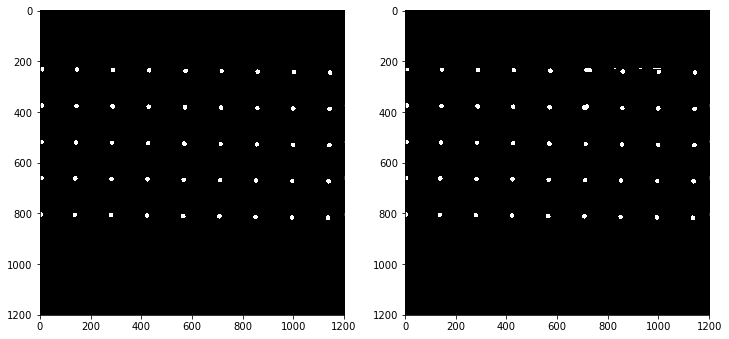

In [21]:
maskbb[1000:, :] = 0
maskbbes[150:230, :] = 0
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 10)
ax[0].imshow(maskbb, interpolation='none',cmap='gray')
ax[1].imshow(maskbbes, interpolation='none', cmap='gray')
plt.savefig("plots/bb_grid_masks_quasi_cleaned.png")

###### Back to business 

In [22]:
img_corr_bb = bblib.compute_scatter_image(bb,rbb,cbb)
img_corr_bbes = bblib.compute_scatter_image(bbes, rbbes, cbbes)

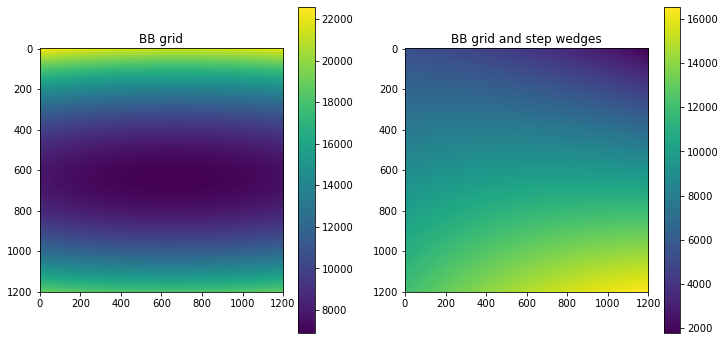

In [23]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 10)

a0=ax[0].imshow(img_corr_bb[::-1], interpolation='none')
ax[0].set_title("BB grid")
fig.colorbar(a0, ax=ax[0],shrink=0.6);

a1=ax[1].imshow(img_corr_bbes[::-1], interpolation='none')
ax[1].set_title("BB grid and step wedges")
fig.colorbar(a1,ax=ax[1],shrink=0.6);

# plt.savefig("plots/Scattering_Correction_Images.png")

# Normalization 

In [24]:
px_per_centimeter = 112.719 # px / cm

### Normalize (Beer Lambert) - with caveats

$$p=-log(\frac{I-I_{dc}}{I_{ob}-I_{dc}})$$

In [30]:
## Normal normalization against background

ob[ob<1]=1 # remove non-positive numbers
ob= ob[::-1]

water[water<1]=1
water=water[::-1]

temp0 = (water - dc) / (ob - dc) 

d0=ob[10:50,10:50].mean()
d=water[10:50,10:50].mean()

p = -np.log(d0/d * temp0)

## Normalization against empty step wedges
es[es<1]=1 # remove non-positive numbers
es= es[::-1]

d0=es[10:50,10:50].mean()

temp1 = (water - dc) / (es - dc) 

p = -np.log(d0/d * temp1)

## Normalization against BB grid
img_corr_bb[img_corr_bb<1]=1
img_corr_bb = img_corr_bb[::-1]

img_corr_bbes[img_corr_bbes<1]=1
img_corr_bbes = img_corr_bbes[::-1]

bb[bb<1]=1
bb = bb[::-1]

D0 = (bb - dc - img_corr_bb)[0:60, 0:60].mean()
D =  (water - dc - img_corr_bbes)[0:60, 0:60].mean()

print(D0 / D)

temp2 = (water - dc - img_corr_bbes) / (bb - dc - img_corr_bb)
temp2[temp2 < 1] = 1
temp2 = temp2[::-1]

p = -np.log(abs(D0/D) * temp2)

5.086852488851467


Desperate attempt to get this to work:

In [31]:
# D0/D

In [32]:
temp = (water - dc - img_corr_bb) / (bb - dc - img_corr_bbes) 

In [33]:
τBB = img_corr_bb * (img_corr_bb[10:50,10:50].mean() / img_corr_bbes[10:50, 10:50].mean()) / img_corr_bb
# τBB2 = img_corr_bbes  img_corr_bbes[]

In [34]:
τBB.mean()

1.4695648108785306

##### Check that the doses are in a good area 

Text(0.5, 1.0, 'D(WATER - DC - IBBES)')

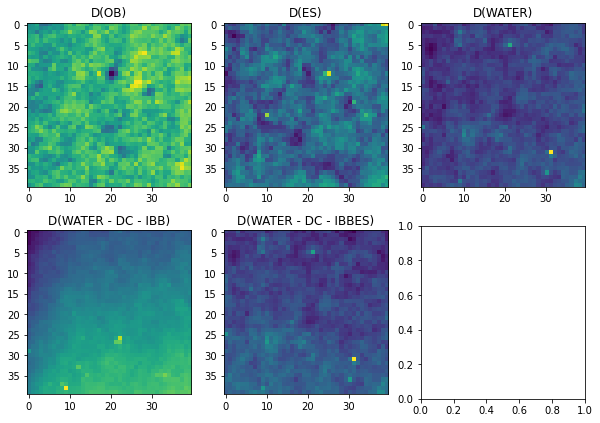

In [35]:
fig, ax = plt.subplots(2,3)
fig.set_size_inches(10,7)
ax = ax.ravel()

ax[0].imshow(ob[10:50,10:50])
ax[0].set_title("D(OB)")
ax[1].imshow(es[10:50, 10:50])
ax[1].set_title("D(ES)")
ax[2].imshow(water[10:50,10:50])
ax[2].set_title("D(WATER)")
ax[3].imshow((bb - dc - img_corr_bb)[10:50, 10:50])
ax[3].set_title("D(WATER - DC - IBB)")
ax[4].imshow((water - dc - img_corr_bbes)[10:50, 10:50])
ax[4].set_title("D(WATER - DC - IBBES)")

###### Display results 

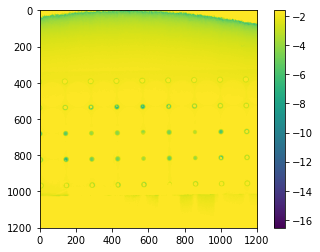

In [36]:
plt.imshow(p)
plt.colorbar()

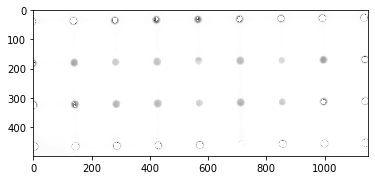

In [37]:
plt.imshow(p[500:1000,0:1150], interpolation="none", cmap="gray")

In [38]:
p=p[500:1000,0:1150]

NameError: name 'l1' is not defined

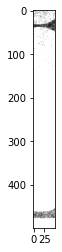

In [39]:
step_wedge_1 = p[:, 200:250]
stw1_average = step_wedge_1.mean(axis=1)

plt.imshow(step_wedge_1, interpolation="none", cmap="gray")

step_wedge_2 = p[:, 500:550]
stw2_average = step_wedge_2.mean(axis=1)

step_wedge_3 = p[:, 800:850]
stw3_average = step_wedge_3.mean(axis=1)

d1 = (stw1_average[:-1] - stw1_average[1:])
d2 = (stw2_average[:-1] - stw2_average[1:])
d3 = (stw3_average[:-1] - stw3_average[1:])

s_stw1 = step_wedge_1.mean(axis=1)[1:]
masked_1 = s_stw1[l1 == 0]

s_stw2 = step_wedge_2.mean(axis=1)[1:]
masked_2 = s_stw2[l2 == 0]

s_stw3 = step_wedge_3.mean(axis=1)[1:]
masked_3 = s_stw3[l3 == 0]

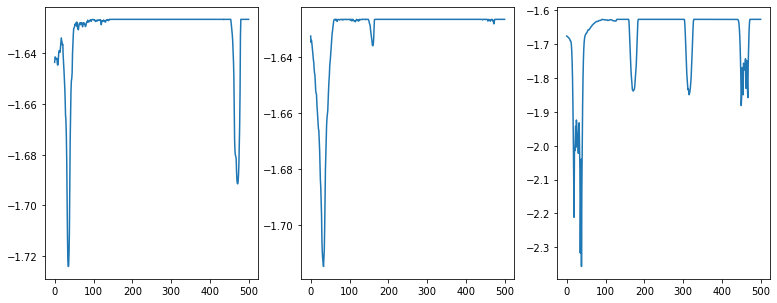

In [40]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(13,5)
ax[0].plot(step_wedge_1.mean(axis=1))

ax[1].plot(step_wedge_2.mean(axis=1))


ax[2].plot(step_wedge_3.mean(axis=1))

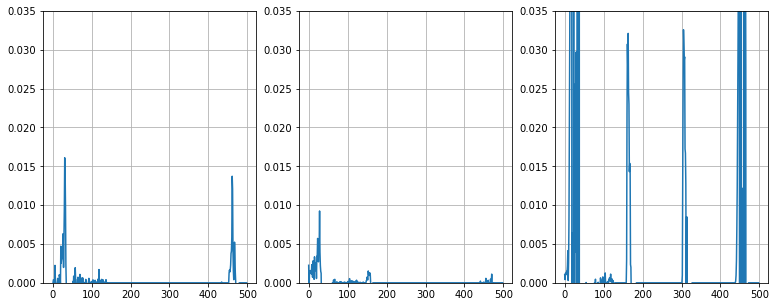

In [41]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(13,5)
ax[0].plot(d1)
ax[0].set_ylim(0, 0.035)
ax[1].plot(d2)
ax[1].set_ylim(0, 0.035)
ax[2].plot(d3)
ax[2].set_ylim(0, 0.035)
for axis in ax:
    axis.grid()

In [277]:
l1 = (d1<0.005)
l2 = (d2<0.0045)
l3 = (d3<0.0050)

NameError: name 'l1' is not defined

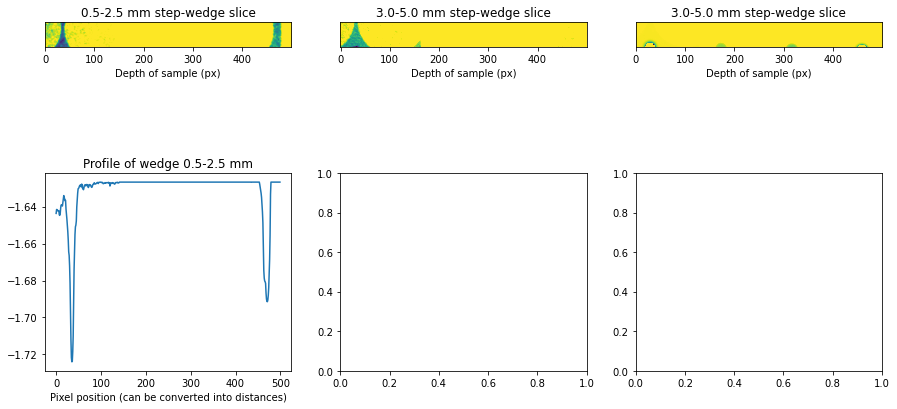

In [42]:
fig, ax = plt.subplots(2, 3)
# fig.set_size_inches(18, 10)
fig.set_size_inches(15, 8)
# fig.set_dpi(800)
ax = ax.ravel()

ax[0].imshow(np.transpose(step_wedge_1))
ax[0].tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False
) # labels along the bottom edge are off
ax[0].set_title("0.5-2.5 mm step-wedge slice")
ax[0].set_xlabel("Depth of sample (px)")

ax[1].imshow(np.transpose(step_wedge_2), interpolation = 'none')
ax[1].tick_params(axis='y', which='both', left=False, right=False, labelleft=False) 
ax[1].set_title("3.0-5.0 mm step-wedge slice")
ax[1].set_xlabel("Depth of sample (px)")

ax[2].imshow(np.transpose(step_wedge_3), interpolation = 'none')
ax[2].tick_params(axis='y', which='both', left=False, right=False, labelleft=False) 
ax[2].set_title("3.0-5.0 mm step-wedge slice")
ax[2].set_xlabel("Depth of sample (px)")

ax[3].plot(step_wedge_1.mean(axis=1))
ax[3].set_title('Profile of wedge 0.5-2.5 mm')
ax[3].set_xlabel('Pixel position (can be converted into distances)')
ax[3].plot(np.where(l1 == 0)[0], masked_1, 'r.')
# ax[3].set_xlim(150, 450)
# ax[3].set_ylim(0, 0.5)
ax[3].set_ylabel(r'$\mu\times thickness$')
ax[3].grid()

ax[4].plot(s_stw2)
ax[4].set_title('Profile of wedge 3.0-5.0 mm')
ax[4].set_xlabel('Pixel position (can be converted into distances)')
ax[4].plot(np.where(l2 == 0)[0], masked_2, 'r.')
# ax[4].set_xlim(150, 450)
# ax[4].set_ylim(0, 0.7)
ax[4].grid()

ax[5].plot(step_wedge_3.mean(axis=1))
ax[5].set_title('Profile of wedge 3.0-5.0 mm')
ax[5].set_xlabel('Pixel position (can be converted into distances)')
ax[5].plot(np.where(l3 == 0)[0], masked_3, 'r.')
# ax[5].set_xlim(120, 450)
# ax[5].set_ylim(0,0.7)
ax[5].grid()



for (axis, wedge) in zip(ax, [step_wedge_1, step_wedge_2, step_wedge_3]):
    pcm = axis.pcolormesh(np.transpose(wedge))
    fig.colorbar(pcm, ax=axis, shrink=1)
    
# fig.savefig()

## Fitting 1  

In [159]:
def linear(x, a, b):
    return a*x+b

fitting_params = np.zeros((3, 2))
error_array = np.zeros((3,2))
for (index, y_values) in enumerate([masked_1, masked_2, masked_3]):
    if index == 0:
        count = 30
    elif index == 1:
        count = 26
    elif index == 2:
        count = 28

    y_values = y_values[0:count]
    y_values = np.flip(y_values)
    
    x_data = range(0, count)
    
    popt, pcov = curve_fit(linear, x_data, y_values, p0=[2.5, 0.1])
    errors = np.sqrt(np.diag(pcov))
    
    fitting_params[index] = popt
    error_array[index] = np.sqrt(np.diag(pcov)) 

In [160]:
print(fitting_params)
array_with_errors = unp.uarray(fitting_params, error_array)

[[-6.95084422e-04  2.59329698e-01]
 [-3.35715874e-02  7.62583397e-01]
 [-1.43192021e-02  6.55050491e-01]]


In [161]:
print("Coefficients")
print(array_with_errors[:,0] * px_per_centimeter)

Coefficients
[-0.07834922096190063+/-0.30613357458485346
 -3.7841557585401366+/-0.25973824261569106
 -1.6140461410274816+/-0.4908092220378189]


## Fitting 2 

In [162]:
# plt.plot(np.where(l1 == 0)[0][1:30], masked_1[1:30], 'r*')

In [163]:
fitting_params2 = np.zeros((3, 2))
error_array2 = np.zeros((3,2))
for (index, (x_values, y_values)) in enumerate(zip([l1, l2, l3], [s_stw1, s_stw2, s_stw3])):
    if index == 0:
        low, up = (1, 30)
    elif index == 1:
        low, up = (1, 22)
    elif index == 2:
        low, up = (1, 22)

    x_data = (np.where(x_values == 0)[0])
    y_values = (y_values[x_data])[low:up]
    x_data = x_data[low:up]
#     print(x_data.shape, y_values.shape)
    
    popt, pcov = curve_fit(linear, x_data, y_values, p0=[2.5, 0.1])
    
    fitting_params2[index] = popt
#     error_array2[index] = np.sqrt(np.diag(pcov)) 

# new1 = lambda x: 
array_with_errors2 = unp.uarray(fitting_params2, error_array)

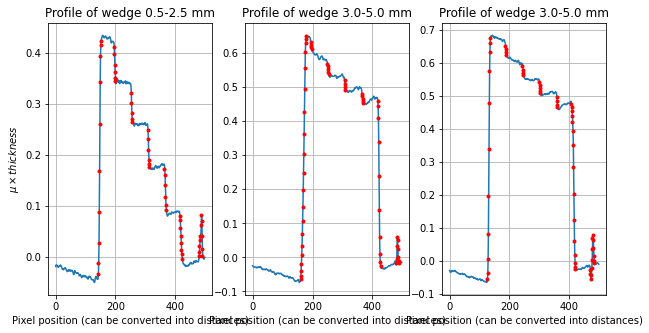

In [166]:
fig, ax = plt.subplots(1, 3)
# fig.set_size_inches(18, 10)
fig.set_size_inches(10, 5)
# fig.set_dpi(800)
ax = ax.ravel()

ax[0].plot(step_wedge_1.mean(axis=1))
ax[0].set_title('Profile of wedge 0.5-2.5 mm')
ax[0].set_xlabel('Pixel position (can be converted into distances)')
ax[0].plot(np.where(l1 == 0)[0], masked_1, 'r.')
# ax[0].set_xlim(150, 450)
# ax[3].set_ylim(0, 0.5)
ax[0].set_ylabel(r'$\mu\times thickness$')
ax[0].grid()

ax[1].plot(s_stw2)
ax[1].set_title('Profile of wedge 3.0-5.0 mm')
ax[1].set_xlabel('Pixel position (can be converted into distances)')
ax[1].plot(np.where(l2 == 0)[0], masked_2, 'r.')
# ax[1].set_xlim(150, 450)
# ax[4].set_ylim(0, 0.7)
ax[1].grid()

ax[2].plot(step_wedge_3.mean(axis=1))
ax[2].set_title('Profile of wedge 3.0-5.0 mm')
ax[2].set_xlabel('Pixel position (can be converted into distances)')
ax[2].plot(np.where(l3 == 0)[0], masked_3, 'r.')
# ax[2].set_xlim(120, 450)
# ax[5].set_ylim(0,0.7)
ax[2].grid()

# for i in range(3):
#     a, b = fitting_params2[i, :]
#     print(a, b)
#     model = lambda x: a * x + b
#     new_linsp = np.linspace(650, 950, 400)
#     ax[i].plot(new_linsp, model(new_linsp), color="green")

In [167]:
# np.where(l3 == 0)[0]

In [168]:
print("Coefficients")
print(abs(array_with_errors2))
print()
print(abs(array_with_errors2[:,0]) * px_per_centimeter)

Coefficients
[[0.00038649795590989185+/-0.002715900376909425
  0.34874881576406014+/-0.04586307989072597]
 [0.02481872463764957+/-0.0023042986773808413
  3.9619077673862453+/-0.033590637049206305]
 [0.0013707837010785567+/-0.004354272323546331
  0.22021190422233242+/-0.06850199011736205]]

[0.043565663092207094+/-0.30613357458485346
 2.7975418224312216+/-0.25973824261569106
 0.15451336800187382+/-0.4908092220378189]


### Averaging 

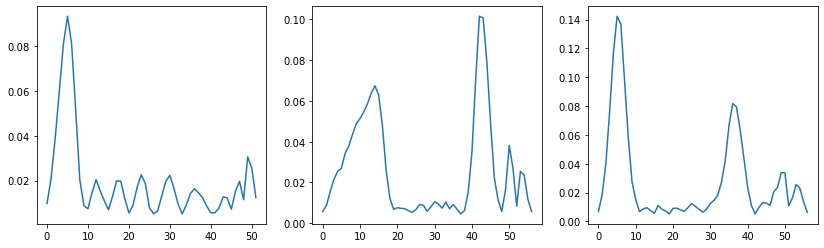

In [169]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(14,4)

ax[0].plot(d1[l1==0])
ax[1].plot(d2[l2==0])
ax[2].plot(d3[l3==0])

mean_diffs = [d1[l1==0].mean(), d2[l2==0].mean(), d3[l3==0].mean()]

In [172]:
(np.array(mean_diffs) * px_per_centimeter)

array([2.22196325, 2.98565356, 3.24281429])